![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [2]:
import numpy as np
import pandas as pd

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [3]:
beers = pd.read_csv("data/datasets_beers.csv", sep = ",")

In [4]:
beers.head(10)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [5]:
beers.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [6]:
print("El DataFrame tiene", beers.ndim, "dimensiones")

El DataFrame tiene 2 dimensiones


# Comprobaciones de valores NaN

In [7]:
beers.isnull().sum()

Unnamed: 0       0
abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [8]:
beers["ibu"] = beers["ibu"].fillna(beers["ibu"].mean()) 
"""
solo cambio ibu ya que abv no sé lo que es ni la importancia que le vayamos a dar, y lo mismo conn style, sin embargo ibu, se usa en un ejercicio, por ello le doy el valor medio del resto de valores"
"""
beers.isnull().sum()

Unnamed: 0     0
abv           62
ibu            0
id             0
name           0
style          5
brewery_id     0
ounces         0
dtype: int64

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [9]:
beers = beers.drop("Unnamed: 0", axis= 1)

In [10]:
beers

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,42.713167,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,42.713167,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,42.713167,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.000000,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,42.713167,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,42.713167,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.000000,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [11]:
print("El DataFrame tiene", beers.shape[0], "filas y,", beers.shape[1], "columnas")

El DataFrame tiene 2410 filas y, 7 columnas


## Ejercicio 5
¿De qué tipo son los datos?

In [12]:
beers.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [13]:
stats = pd.DataFrame(beers.describe(exclude = object))
stats

,abv,ibu,id,brewery_id,ounces
count,2348.000000,2410.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,19.813927,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,30.000000,808.250000,93.000000,12.000000
50%,0.056000,42.713167,1453.500000,205.000000,12.000000
75%,0.067000,42.713167,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [14]:
beers["style"].value_counts()

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [15]:
print(beers[10:21])

      abv        ibu    id                          name  \
10  0.072  42.713167  2099             Sophomoric Saison   
11  0.073  42.713167  2098         Regional Ring Of Fire   
12  0.069  42.713167  2097                    Garce Selé   
13  0.085  42.713167  1980               Troll Destroyer   
14  0.061  60.000000  1979                  Bitter Bitch   
15  0.060  42.713167  2318                   Ginja Ninja   
16  0.060  42.713167  2170                 Cherried Away   
17  0.060  42.713167  2169                  Rhubarbarian   
18  0.060  42.713167  1502                   BrightCider   
19  0.082  42.713167  1593   He Said Baltic-Style Porter   
20  0.082  42.713167  1592  He Said Belgian-Style Tripel   

                      style  brewery_id  ounces  
10   Saison / Farmhouse Ale         177    12.0  
11   Saison / Farmhouse Ale         177    12.0  
12   Saison / Farmhouse Ale         177    12.0  
13              Belgian IPA         177    12.0  
14  American Pale Ale (APA)  

In [16]:
print(beers.loc[10: 21, "name" : "ounces"])

                            name                    style  brewery_id  ounces
10             Sophomoric Saison   Saison / Farmhouse Ale         177    12.0
11         Regional Ring Of Fire   Saison / Farmhouse Ale         177    12.0
12                    Garce Selé   Saison / Farmhouse Ale         177    12.0
13               Troll Destroyer              Belgian IPA         177    12.0
14                  Bitter Bitch  American Pale Ale (APA)         177    12.0
15                   Ginja Ninja                    Cider         154    12.0
16                 Cherried Away                    Cider         154    12.0
17                  Rhubarbarian                    Cider         154    12.0
18                   BrightCider                    Cider         154    12.0
19   He Said Baltic-Style Porter            Baltic Porter         368    12.0
20  He Said Belgian-Style Tripel                   Tripel         368    12.0
21                 Lower De Boom      American Barleywine       

In [17]:
print(beers.loc[10: 21, ["abv", "ibu", "ounces"]])

      abv        ibu  ounces
10  0.072  42.713167    12.0
11  0.073  42.713167    12.0
12  0.069  42.713167    12.0
13  0.085  42.713167    12.0
14  0.061  60.000000    12.0
15  0.060  42.713167    12.0
16  0.060  42.713167    12.0
17  0.060  42.713167    12.0
18  0.060  42.713167    12.0
19  0.082  42.713167    12.0
20  0.082  42.713167    12.0
21  0.099  92.000000     8.4


In [18]:
array_3 = np.array(beers.loc[10: 21, "name" : "ounces"])
array_3

array([['Sophomoric Saison', 'Saison / Farmhouse Ale', 177, 12.0],
       ['Regional Ring Of Fire', 'Saison / Farmhouse Ale', 177, 12.0],
       ['Garce Selé', 'Saison / Farmhouse Ale', 177, 12.0],
       ['Troll Destroyer', 'Belgian IPA', 177, 12.0],
       ['Bitter Bitch', 'American Pale Ale (APA)', 177, 12.0],
       ['Ginja Ninja', 'Cider', 154, 12.0],
       ['Cherried Away', 'Cider', 154, 12.0],
       ['Rhubarbarian', 'Cider', 154, 12.0],
       ['BrightCider', 'Cider', 154, 12.0],
       ['He Said Baltic-Style Porter', 'Baltic Porter', 368, 12.0],
       ['He Said Belgian-Style Tripel', 'Tripel', 368, 12.0],
       ['Lower De Boom', 'American Barleywine', 368, 8.4]], dtype=object)

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [19]:
beers["ounces"].sum()

np.float64(32757.3)

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [20]:
beers["ibu"].mean()

np.float64(42.71316725978647)

In [21]:
print("Max:", beers["ibu"].max())
print("Min:", beers["ibu"].min())

Max: 138.0
Min: 4.0


In [22]:
maximo = beers[beers["ibu"] == beers["ibu"].max()]
print("El nombre del máximo es:", maximo["name"].unique())
minimo = beers[beers["ibu"] == beers["ibu"].min()]
print("El nombre del mínimo es:", minimo["name"].unique())

El nombre del máximo es: ['Bitter Bitch Imperial IPA']
El nombre del mínimo es: ['Summer Solstice' 'Summer Solstice Cerveza Crema (2009)'
 'Summer Solstice (2011)']


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [23]:
beers["ibu"].std()
# al ver que la desviación es alta, se entiende que los valores de ibu son bastante dispares

np.float64(19.813926931806947)

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [24]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import seaborn as sns

In [26]:
print("Las únicas que podrían tener una relación lineal son ibu y abv ya\nque su correlación está cerca de 1")
beers[["abv", "ibu", "id", "brewery_id", "ounces"]].corr()


Las únicas que podrían tener una relación lineal son ibu y abv ya
que su correlación está cerca de 1


,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.520011,0.042811,-0.098632,0.172529
ibu,0.520011,1.000000,0.000373,-0.003549,0.039995
id,0.042811,0.000373,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.003549,-0.504030,1.000000,-0.133762
ounces,0.172529,0.039995,0.100843,-0.133762,1.000000


En esta gráfica podemos observar que tampoco tienen una relación lineal


<Axes: xlabel='abv', ylabel='ibu'>

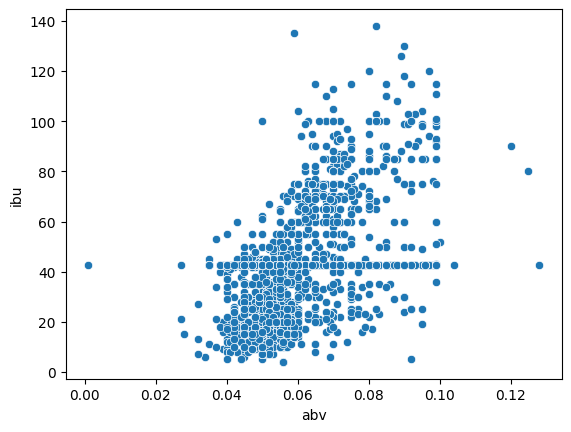

In [27]:
print("En esta gráfica podemos observar que tampoco tienen una relación lineal")
sns.scatterplot(x = "abv", y = "ibu", data = beers)

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

Se trata de una distribución asimétrica


<Axes: >

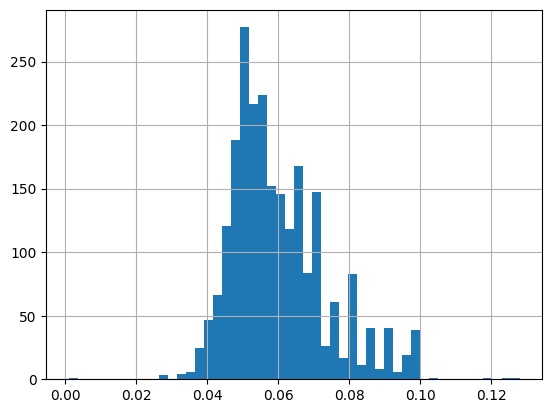

In [28]:
print("Se trata de una distribución asimétrica")
beers["abv"].hist(bins = 50)

In [29]:
beers["abv"].skew()

np.float64(0.9584771340361382)

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

<Axes: xlabel='abv'>

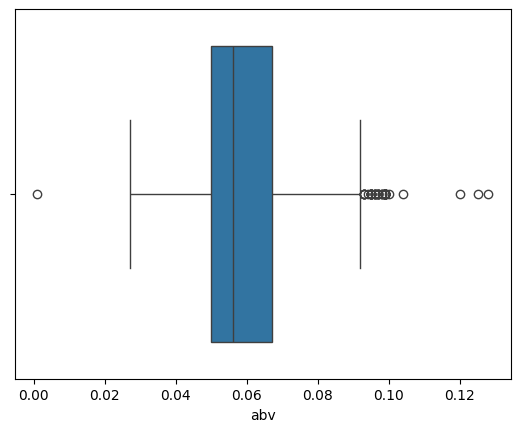

In [30]:
sns.boxplot(x = beers["abv"])

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [31]:
print("Los 10 estilos que más alcohol tiennen de media son:\n", beers.groupby("style")["abv"].agg(["mean", "count"]).sort_values("mean", ascending = False).head(10))

Los 10 estilos que más alcohol tiennen de media son:
                                       mean  count
style                                            
English Barleywine                0.107667      3
Quadrupel (Quad)                  0.104000      4
American Barleywine               0.099000      3
American Malt Liquor              0.099000      1
Russian Imperial Stout            0.097636     11
American Double / Imperial Stout  0.093667      9
American Double / Imperial IPA    0.087369    103
Tripel                            0.086818     11
Baltic Porter                     0.085167      6
Belgian Strong Pale Ale           0.084000      7


In [32]:
print("Los 10 estilos más amargos son:\n", beers.groupby("style")["ibu"].mean().sort_values(ascending = False).head(10))

Los 10 estilos más amargos son:
 style
American Double / Imperial IPA        78.860905
American Barleywine                   78.237722
Russian Imperial Stout                74.558137
English Barleywine                    66.666667
American Double / Imperial Pilsner    63.856584
American India Pale Lager             63.333333
American Strong Ale                   62.173310
American IPA                          60.404999
American Black Ale                    57.261408
English Stout                         54.356584
Name: ibu, dtype: float64


## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [33]:
breweries = pd.read_csv("data/datasets_breweries.csv", sep = ",")

In [34]:
breweries

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [35]:
breweries = breweries.rename(columns = {"Unnamed: 0" : "brewery_id"})
breweries

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [36]:
breweries = breweries.rename(columns = {"name" : "brewery_name"})
breweries

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [37]:
union = pd.merge(beers, breweries, on = "brewery_id")
union

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,42.713167,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,42.713167,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,42.713167,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.000000,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,42.713167,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,42.713167,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.000000,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [38]:
union.isnull().sum()

abv             62
ibu              0
id               0
name             0
style            5
brewery_id       0
ounces           0
brewery_name     0
city             0
state            0
dtype: int64

## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [39]:
print(len(union["state"].value_counts()))
print(len(union["state"].unique()))

51
51


In [40]:
print(len(union["city"].value_counts()))
print(len(union["city"].unique()))

384
384


In [51]:
print(len(union["brewery_name"].value_counts()))
print(len(union["brewery_id"].unique()))

551
558


## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [53]:
union.groupby(["city", "state"])["abv"].mean()

city            state
Abingdon        VA       0.059000
Abita Springs   LA       0.050667
Ada             MI       0.069000
Afton           VA       0.059000
Airway Heights  WA       0.051600
                           ...   
Woodinville     WA       0.063250
Worcester       MA       0.065000
Yakima          WA       0.056000
Yardley         PA       0.052000
York            PA       0.058000
Name: abv, Length: 401, dtype: float64

In [43]:
union.groupby(["city", "state"])["abv"].median()

city            state
Abingdon        VA       0.0590
Abita Springs   LA       0.0450
Ada             MI       0.0690
Afton           VA       0.0590
Airway Heights  WA       0.0530
                          ...  
Woodinville     WA       0.0650
Worcester       MA       0.0650
Yakima          WA       0.0560
Yardley         PA       0.0520
York            PA       0.0575
Name: abv, Length: 401, dtype: float64

In [44]:
union.groupby(["city", "state"])["abv"].max()

city            state
Abingdon        VA       0.059
Abita Springs   LA       0.065
Ada             MI       0.069
Afton           VA       0.065
Airway Heights  WA       0.067
                         ...  
Woodinville     WA       0.065
Worcester       MA       0.065
Yakima          WA       0.068
Yardley         PA       0.052
York            PA       0.065
Name: abv, Length: 401, dtype: float64

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [54]:
union["state"].unique()

array([' OR', ' IN', ' CA', ' FL', ' MO', ' WA', ' CO', ' LA', ' KY',
       ' AK', ' WI', ' OH', ' OK', ' NC', ' MI', ' TX', ' CT', ' AL',
       ' MA', ' AZ', ' MN', ' ME', ' VA', ' IL', ' TN', ' MT', ' WY',
       ' NE', ' NY', ' UT', ' NJ', ' PA', ' NV', ' SC', ' GA', ' RI',
       ' IA', ' AR', ' ID', ' SD', ' DC', ' KS', ' ND', ' VT', ' MD',
       ' WV', ' HI', ' DE', ' NM', ' MS', ' NH'], dtype=object)

In [55]:
union.loc[1, "state"]

' IN'

In [56]:
print("Las 10 cervezas más amargas de inndianna son:", union[union["state"].str.contains("IN")].groupby(["name"])["ibu"].sum().sort_values(ascending = False).head(10))

Las 10 cervezas más amargas de inndianna son: name
Hopkick Dropkick           115.0
Overlord Imperial IPA      115.0
Half Cycle IPA             104.0
Isis                        91.0
Csar                        90.0
The Gadget                  90.0
3:33 Black IPA              86.0
Pale Alement                80.0
Grapefruit Jungle (GFJ)     77.0
Mound Builder IPA           77.0
Name: ibu, dtype: float64


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [46]:
union.groupby("city")["ibu"].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.000000,135.000000,135.000000,135.000000,135.000000
Abita Springs,3.0,27.333333,21.455380,13.000000,15.000000,17.000000,34.500000,52.000000
Ada,1.0,42.713167,NaN,42.713167,42.713167,42.713167,42.713167,42.713167
Afton,4.0,43.000000,19.899749,22.000000,28.000000,45.000000,60.000000,60.000000
Airway Heights,5.0,42.713167,0.000000,42.713167,42.713167,42.713167,42.713167,42.713167
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.000000,39.750000,44.000000,51.000000,72.000000
Worcester,1.0,69.000000,NaN,69.000000,69.000000,69.000000,69.000000,69.000000
Yakima,2.0,54.000000,22.627417,38.000000,46.000000,54.000000,62.000000,70.000000


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [57]:
mask = union[union["abv"] > 0.07]

In [65]:
mask.groupby("brewery_name")["name"].unique().index

Index(['18th Street Brewery', '21st Amendment Brewery',
       '450 North Brewing Company', '7 Seas Brewing Company',
       'Against The Grain Brewery', 'Against the Grain Brewery',
       'Alameda Brewing', 'Anthem Brewing Company',
       'Appalachian Mountain Brewery', 'Armadillo Ale Works',
       ...
       'Wachusett Brewing Company', 'West Sixth Brewing',
       'Weston Brewing Company', 'Wild Onion Brewing Company',
       'Wildwood Brewing Company', 'Wind River Brewing Company',
       'Wingman Brewers', 'Wisconsin Brewing Company',
       'Worthy Brewing Company', 'Wynkoop Brewing Company'],
      dtype='object', name='brewery_name', length=183)

In [66]:
union[union["brewery_name"].isin(mask.groupby("brewery_name")["name"].unique().index)]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,42.713167,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,42.713167,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,42.713167,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.000000,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,42.713167,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,42.713167,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.000000,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [49]:
mask_1 = union.groupby("state")["ibu"].mean() > union["ibu"].mean()

In [72]:
pd.merge(union, mask_1, on='state', how='inner').groupby("state")["name"].unique()

state
AK    [Freeride APA, Alaskan Amber, Northern Lights ...
AL    [Truck Stop Honey Brown Ale, Naked Pig Pale Al...
AR    [Behemoth, Arkansas Red, Core Oatmeal Stout, C...
AZ    [Barrio Blanco, Barrio Tucson Blonde, Noche Du...
CA    [He Said Baltic-Style Porter, He Said Belgian-...
CO    [Colorado Native, Colorado Native (2011), On-O...
CT    [Palate Mallet, Back East Porter, Back East Go...
DC    [Stone of Arbroath, The Tradition, El Hefe Spe...
DE              [Appreciation Ale, Greenville Pale Ale]
FL    [Bimini Twist, Beach Blonde, Rod Bender Red, W...
GA    [Tybee Island Blonde, Savannah Brown Ale, Trop...
HI    [Kaua'i Golden Ale, Sunset Amber, Hapa Brown A...
IA    [Des Moines IPA, Capital Gold Golden Lager, Fa...
ID    [Aviator Raspberry Blonde, 3 Picket Porter, Ru...
IL    [Blueberry Blonde, Galaxy IPA, Painted Turtle,...
IN    [Devil's Cup, Rise of the Phoenix, Sinister, S...
KS    [Thrasher Session India Pale Ale, Gutch Englis...
KY    [Citra Ass Down, The Brown Note, Lon